In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import os

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
##### Google Colab #####
# Specify directory of course materials in Google Drive
module_dir = (
    "/content/drive/My Drive/3359 project/"
)
import sys
sys.path.append(module_dir)

In [4]:
# Load the data
tweets_df = pd.read_csv('/content/drive/My Drive/3359 project/train.csv')
tweets_df.head()

,id,tweet
0,2,Stuning even for the non-gamer: This sound tra...
1,2,The best soundtrack ever to anything.: I'm rea...
2,2,Amazing!: This soundtrack is my favorite music...
3,2,Excellent Soundtrack: I truly like this soundt...
4,2,"Remember, Pull Your Jaw Off The Floor After He..."


In [ ]:
tweets_df.describe()

,id
count,3600000.0
mean,1.5
std,0.5
min,1.0
25%,1.0
50%,1.5
75%,2.0
max,2.0


array([[<AxesSubplot:title={'center':'id'}>]], dtype=object)

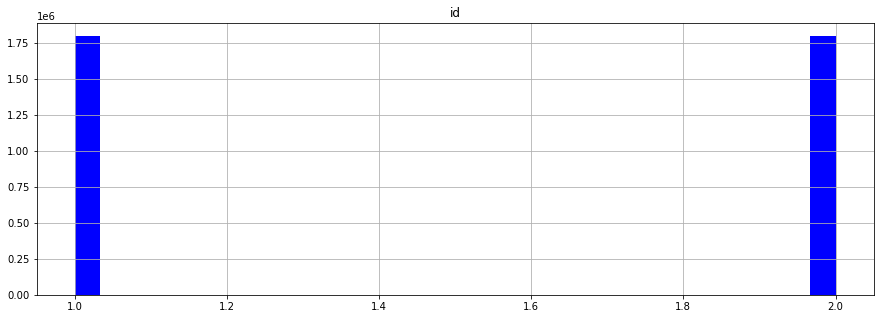

In [ ]:
tweets_df.hist(bins=30, figsize=(15,5), color='b')

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='id', ylabel='count'>

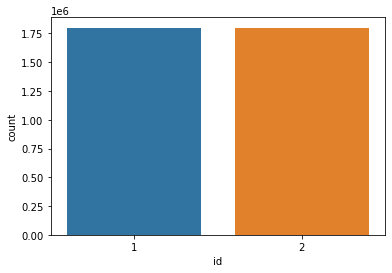

In [ ]:
sns.countplot(tweets_df['id'], label='count')

In [5]:
df_sample = tweets_df.sample(frac=0.001, replace=False, random_state=1).reset_index().drop(columns = ["index"])
tweets_df=df_sample

In [6]:
positive = tweets_df[tweets_df['id']==2]
positive
negative = tweets_df[tweets_df['id']==1]
negative

,id,tweet
1,1,"Stay far, far away.: I made it through about 6..."
2,1,Lost Woods: Lost WoodsI didn't really understa...
3,1,"Renaissance -12, Women's brown suead shoes: Re..."
5,1,No replacements: We bought this one for my fir...
9,1,Too easy to open!: Definitely put this out of ...
...,...,...
3594,1,poor quality: This item broke after 4 uses. Th...
3595,1,Disappointed!: Really like both the main actor...
3596,1,Oh please: I love the concept that Birmingham ...
3597,1,More efficient to hand prime with the Lee pres...


In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
# let imprt the stopwords and see them
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
def message_cleaning(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)
    punc_removed_join_clean = [word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return punc_removed_join_clean

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=message_cleaning, dtype='uint8')
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet']).toarray()

In [13]:
vectorizer.get_feature_names()[:10]
tweets_countvectorizer
tweets_countvectorizer.shape

(3600, 26935)

In [15]:
X = tweets_countvectorizer
y = tweets_df['id']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
X.shape
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

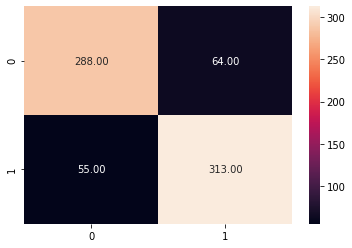

In [17]:
np.set_printoptions(precision=3)
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt='.2f')

In [18]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.84      0.82      0.83       352
           2       0.83      0.85      0.84       368

    accuracy                           0.83       720
   macro avg       0.83      0.83      0.83       720
weighted avg       0.83      0.83      0.83       720

